In [1]:
import igraph as ig
import numpy as np
import pandas as pd
from IPython.core.display import display, SVG
import matplotlib.pyplot as plt
import umap
from scipy.special import comb as choose
import scipy.stats as ss
from itertools import groupby


In [2]:
## power law distribution
def powerLawDist(xmin=2,xmax=10,gamma=-2.0):
    p = []
    for k in np.arange(xmin,xmax+1,1):
        p.append(k**gamma)
    C = 1/np.sum(p)
    P = [x*C for x in p]
    return P
## sampling from the above
def powerLawSample(n=1,xmin=2,xmax=10,gamma=-2.0):
    p = powerLawDist(xmin,xmax,gamma)
    s = [1]
    while np.sum(s)%2 != 0:
        s = np.random.choice(np.arange(xmin,xmax+1,1),size=n,p=p)
    return s.tolist()


## Clustering coefficients

In [3]:
## star example
g = ig.Graph.Erdos_Renyi(n=22, m=0)
g.vs['color'] = 'grey'
g.vs[0]['color'] = g.vs[1]['color'] = 'red'
g.add_edge(0,1)
for i in range(20):
    g.add_edge(0,i+2)
    g.add_edge(1,i+2)

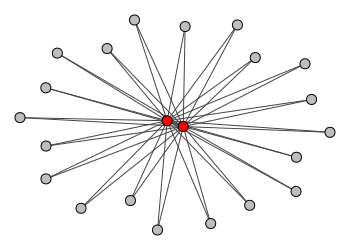

In [4]:
g.vs['size']=10
ly = g.layout("kk")  ## kamada-kawai; usually nice
ig.plot(g, layout=ly, bbox=(0,0,350,250))

In [5]:
## overall transitivity T
g.transitivity_undirected()

0.13636363636363635

In [6]:
## Local transitivity for red and grey nodes respectively
print( g.transitivity_local_undirected(1) , g.transitivity_local_undirected(2) )

0.09523809523809523 1.0


In [7]:
## clustering coef. 
g.transitivity_avglocal_undirected()

0.9177489177489178

In [8]:
## Now for ER graph (both have expected value p)
L = []
size = 500 ## try 50, 100, 500 ...
for p in np.arange(.1,.65,.1):
    g = ig.Graph.Erdos_Renyi(n=size, p=p)
    L.append([p,g.transitivity_undirected(),g.transitivity_avglocal_undirected()])
pd.DataFrame(L, columns=['p','T','CC'])

,p,T,CC
0,0.1,0.101261,0.101210
1,0.2,0.200010,0.199942
2,0.3,0.300313,0.300328
3,0.4,0.399852,0.399853
4,0.5,0.500299,0.500302
5,0.6,0.599670,0.599671


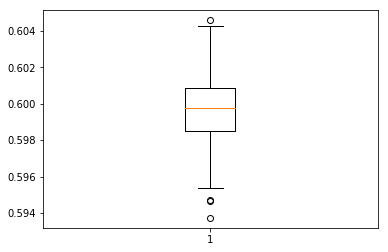

In [9]:
## histogram - local CC's
lcc = g.transitivity_local_undirected()
plt.boxplot(lcc);

## Power law distribution

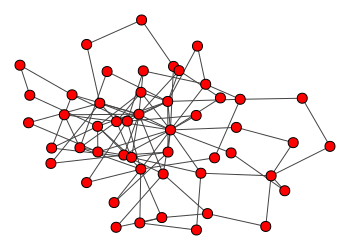

In [10]:
# gamma = -2
d = powerLawSample(n=50,xmin=2,xmax=20)
g = ig.Graph.Degree_Sequence(d, method="no_multiple")
g.vs['size']=10
ly = g.layout("kk")  ## kamada-kawai; usually nice
ig.plot(g, layout=ly, bbox=(0,0,350,250))


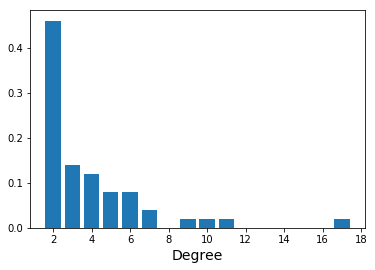

In [11]:
deg = np.sort(d).tolist()
freq = [len(list(group))/len(deg) for key, group in groupby(deg)]
deg = np.unique(deg)
plt.bar(deg,freq)
plt.xlabel('Degree', fontsize=14);


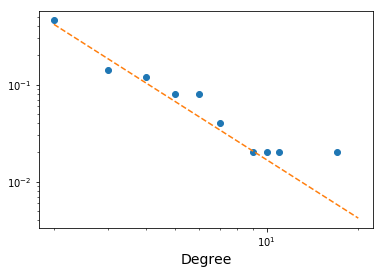

In [12]:
plt.loglog(deg,freq,'o')
plt.xlabel('Degree',fontsize=14)
p = powerLawDist(xmin=2,xmax=20)
plt.loglog(np.arange(2,21,1),p,'--');

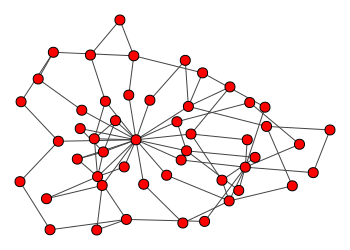

In [13]:
# gamma = -3
p = powerLawDist(xmin=2,xmax=20,gamma=-3.0)
d = powerLawSample(n=50,xmin=2,xmax=20,gamma=-3.0)
g = ig.Graph.Degree_Sequence(d, method="no_multiple")
g.vs['size']=10
ly = g.layout("kk")  ## kamada-kawai; usually nice
ig.plot(g, layout=ly, bbox=(0,0,350,250))


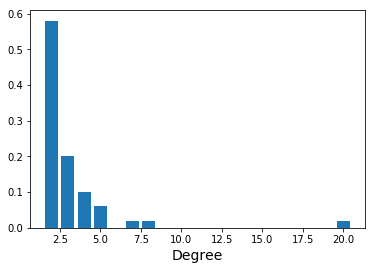

In [14]:
deg = np.sort(d)
freq = [len(list(group))/len(deg) for key, group in groupby(deg)]
deg = np.unique(deg)
plt.bar(deg,freq)
plt.xlabel('Degree', fontsize=14);


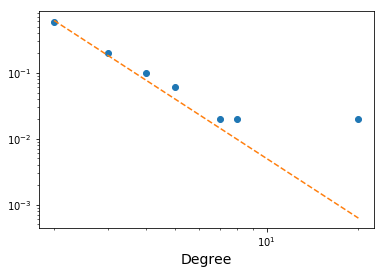

In [15]:
plt.loglog(deg,freq,'o')
plt.xlabel('Degree', fontsize=14)
plt.loglog(np.arange(2,21,1),p,'--');

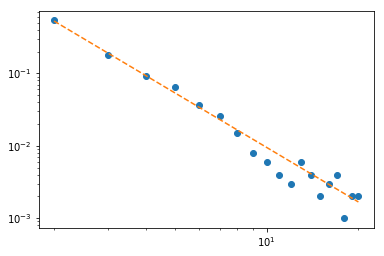

In [16]:
## look at larger sample
p = powerLawDist(xmin=2,xmax=20, gamma=-2.5)
d = powerLawSample(n=1000,xmin=2,xmax=20, gamma=-2.5)
deg = np.sort(d)
freq = [len(list(group))/len(deg) for key, group in groupby(deg)]
deg = np.unique(deg)
plt.loglog(deg,freq,'o')
plt.loglog(np.arange(2,21,1),p,'--');


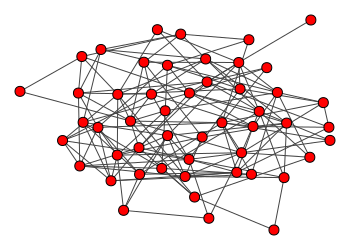

In [17]:
## igraph has a power law graph generator given n and m
g = ig.Graph.Static_Power_Law(n=50,m=150,exponent_out=2.5)
g.vs['size']=10
ly = g.layout("kk")  ## kamada-kawai; usually nice
ig.plot(g, layout=ly, bbox=(0,0,350,250))


## Chung-Lu Model

In [18]:
## we can also use the CL model
def CL(d):
    m = np.sum(d)//2
    n = len(d)
    s = np.sum(d)
    p = [i/s for i in d]
    g = ig.Graph.Erdos_Renyi(n=n, m=0)
    while g.ecount() < m:
        e = np.random.choice(n, size=2, replace=False, p=p)
        g.add_edge(e[0],e[1])
        g.simplify()
    return g

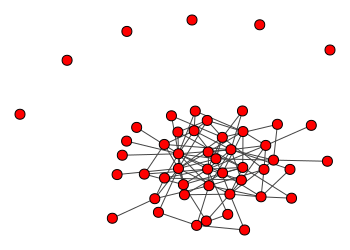

In [19]:
# gamma = -2
p = powerLawDist(xmin=2,xmax=20)
d = powerLawSample(n=50,xmin=2,xmax=20)
g = CL(d)
g.vs['size']=10
ly = g.layout("kk")  ## kamada-kawai; usually nice
ig.plot(g, layout=ly, bbox=(0,0,350,250))


## Barabasi-Albert Graph

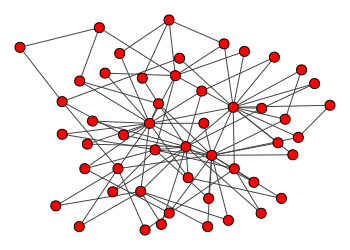

In [20]:
g = ig.Graph.Barabasi(50,2)
g.vs['size']=10
ly = g.layout("kk")  ## kamada-kawai; usually nice
ig.plot(g, layout=ly, bbox=(0,0,350,250))

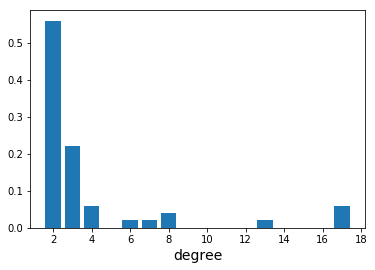

In [21]:
d = g.degree()
deg = np.sort(d)
freq = [len(list(group))/len(deg) for key, group in groupby(deg)]
deg = np.unique(deg)
plt.xlabel('degree', fontsize=14)
plt.bar(deg,freq);


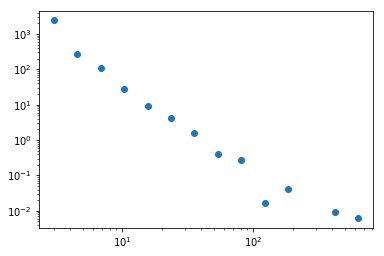

In [22]:
## log-log binned plot for a larger graph
g = ig.Graph.Barabasi(5000,3)
d = g.degree()
deg = np.sort(d)
freq = [len(list(group))/len(deg) for key, group in groupby(deg)]
bins = np.logspace(np.log10(np.min(deg)), np.log10(np.max(deg)), num=15)
widths = (bins[1:] - bins[:-1])
hist = np.histogram(deg, bins=bins)
Hist = hist[0]/widths
Bins = bins[:-1]
# plot it!
X = [Bins[i] for i in range(len(Hist)) if Hist[i]!=0]
Y = [Hist[i] for i in range(len(Hist)) if Hist[i]!=0]
plt.loglog(X,Y,'o');


fitted gamma: -2.3882428991990494


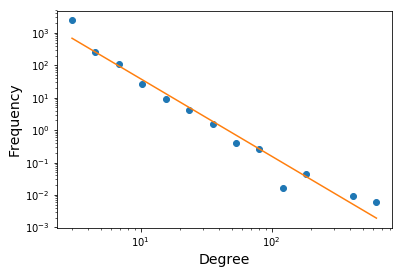

In [23]:
## add regression fit
x = np.array([np.log10(i) for i in X]).reshape(-1,1)
y = [np.log10(i) for i in Y]
# Create linear regression object
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
rf = regr.fit(x,y)
pred = [10**i for i in rf.predict(x)]
print('fitted gamma:',rf.coef_[0])
plt.loglog(X, Y, 'o') ## as above
plt.loglog(X, pred) ## fitted
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Frequency',fontsize=14);


In [24]:
## path length vs ER graph
g = ig.Graph.Barabasi(500,2)
m = g.ecount()
print('BA: ',g.average_path_length())
g = ig.Graph.Erdos_Renyi(n=500, m=m)
print('ER:',g.average_path_length())

BA:  3.374460921843687
ER: 4.56376611994491


In [25]:
## look at binned (log) degrees for ER graph
g = ig.Graph.Barabasi(5000,2)
m = g.ecount()
g = ig.Graph.Erdos_Renyi(n=5000,m=m)

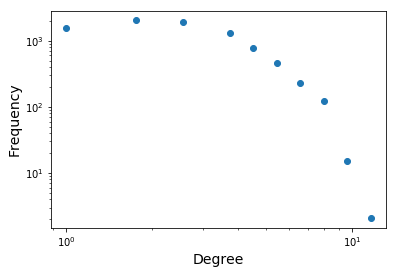

In [26]:
## plot (ignore degree==0 nodes)
d = np.sort(g.degree())
deg = [i for i in d if i>0] ## ignore degree-0 nodes
freq = [len(list(group))/len(deg) for key, group in groupby(deg)]
bins=np.logspace(np.log10(np.min(deg)), np.log10(np.max(deg)), num=15)
widths = (bins[1:] - bins[:-1])
hist = np.histogram(deg, bins=bins)
hist_norm = hist[0]/widths
# plot it!
plt.loglog(bins[:-1], hist_norm, 'o')
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Frequency',fontsize=14);